In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pyc
%matplotlib inline

In [6]:
df = pd.read_csv("master.csv")
df.drop(['HDI for year','country-year'],axis=1,inplace=True)
df = df[df['year']!=2016]
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [7]:
nr_countries = df['country'].unique()
print('The number of distinct countries: ',len(nr_countries))

The number of distinct countries:  100


In [8]:
print('Total number of values:', np.size(df))
print('Total number of missing values:', df.isnull().sum().sum())
print('Fraction of missing values:',df.isnull().sum().sum()/ np.size(df))
print('Number of lines with no null:', np.size(df.loc[df.isnull().sum(1)==0].index))

Total number of values: 276600
Total number of missing values: 0
Fraction of missing values: 0.0
Number of lines with no null: 27660


In [9]:
sui = df.groupby('suicides_no').count()/len(df)
sui.head()

,country,year,sex,age,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
suicides_no,,,,,,,,,
0,0.154049,0.154049,0.154049,0.154049,0.154049,0.154049,0.154049,0.154049,0.154049
1,0.055459,0.055459,0.055459,0.055459,0.055459,0.055459,0.055459,0.055459,0.055459
2,0.039516,0.039516,0.039516,0.039516,0.039516,0.039516,0.039516,0.039516,0.039516
3,0.031092,0.031092,0.031092,0.031092,0.031092,0.031092,0.031092,0.031092,0.031092
4,0.025090,0.025090,0.025090,0.025090,0.025090,0.025090,0.025090,0.025090,0.025090


Text(0.5,0,'Generation')

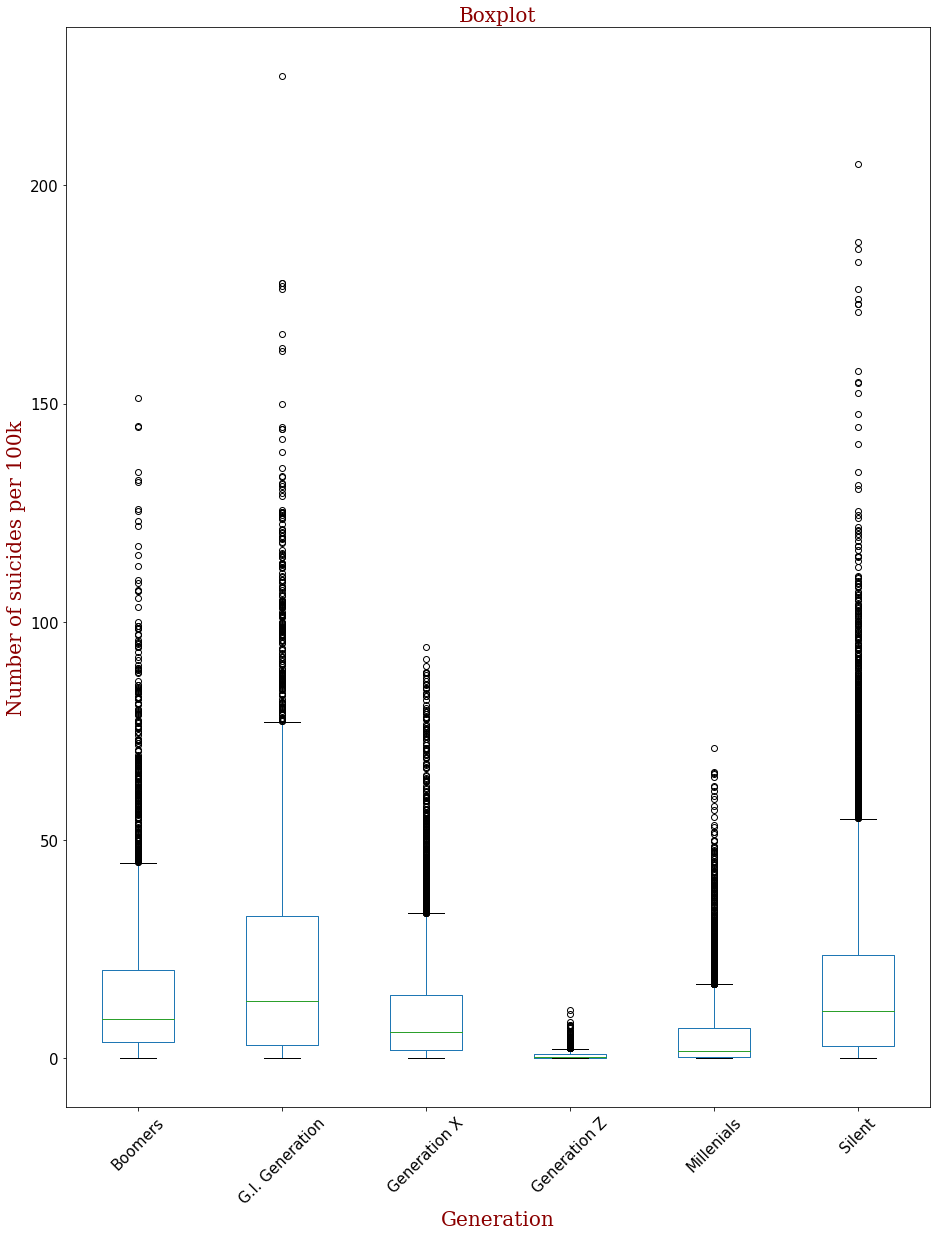

In [10]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

df.boxplot(by='generation', column = ['suicides/100k pop'], figsize=(15,20), rot=45, grid=False, fontsize=15)
plt.suptitle('')
plt.title('Boxplot', fontsize=20, fontdict = font)
plt.ylabel('Number of suicides per 100k', fontsize=20, fontdict = font)
plt.xlabel('Generation', fontsize=20, fontdict = font)

In [11]:
#Lets put the continents in the dataset.
def change_country_name(country):
    if(country == 'Republic of Korea'):
        return 'North Korea'
    elif(country == 'Saint Vincent and Grenadines'):
        return 'Saint Vincent and the Grenadines'
    else:
        return country

def get_continent(country):
    alpha2 = pyc.country_name_to_country_alpha2(country)
    return pyc.country_alpha2_to_continent_code(alpha2)

df['country'] = df['country'].map(change_country_name)
df['Continent'] = df['country'].map(get_continent)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,EU
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,EU
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,EU
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,EU
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,EU


Text(0.5,0,'Generation')

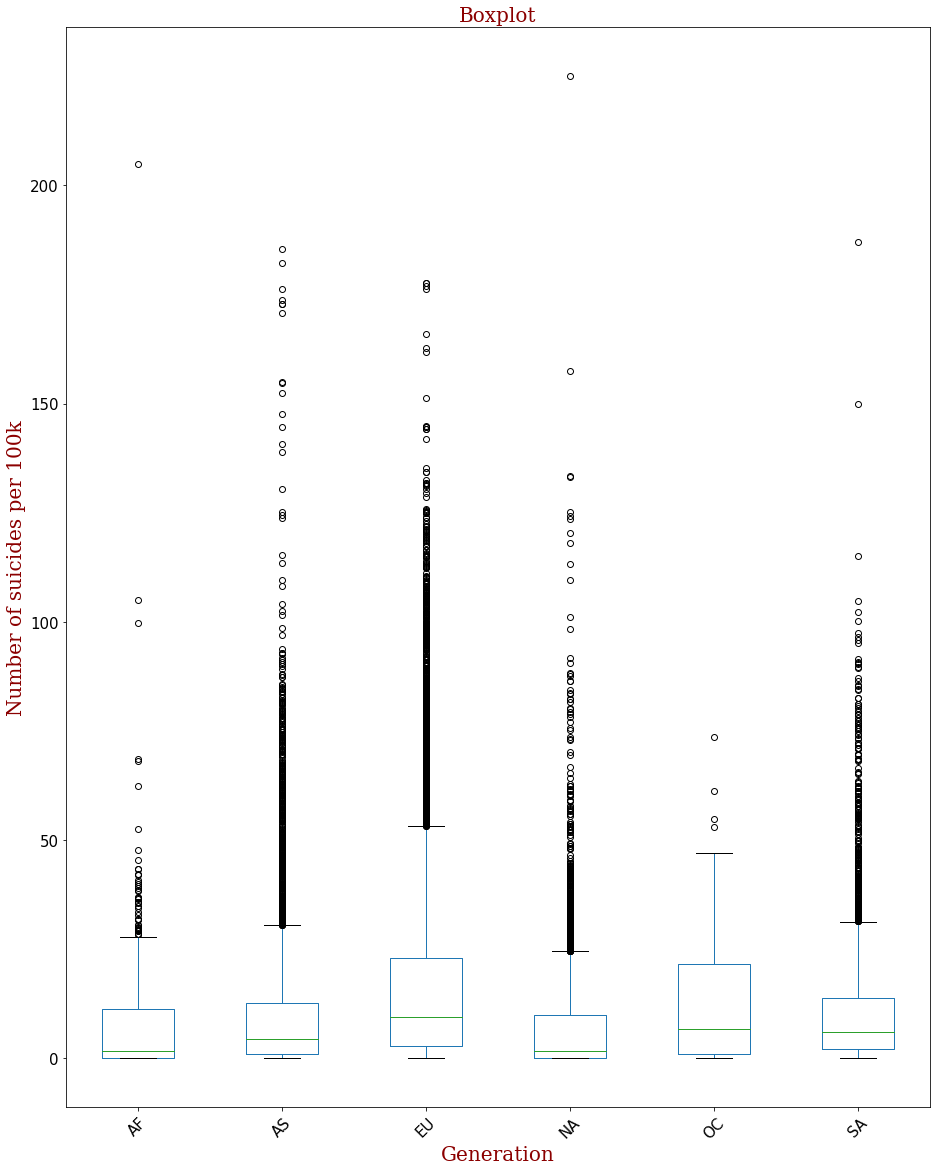

In [12]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

df.boxplot(by='Continent', column = ['suicides/100k pop'], figsize=(15,20), rot=45, grid=False, fontsize=15)
plt.suptitle('')
plt.title('Boxplot', fontsize=20, fontdict = font)
plt.ylabel('Number of suicides per 100k', fontsize=20, fontdict = font)
plt.xlabel('Generation', fontsize=20, fontdict = font)

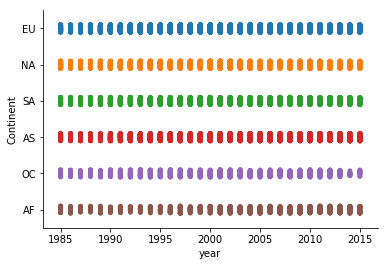

In [13]:
#Just want a month specific crime-type and hour
jitter_data = df[['year','Continent','suicides_no']]

#Create Jitter plot
sns.stripplot(x='year', y='Continent', data=jitter_data, jitter=True)
sns.despine()

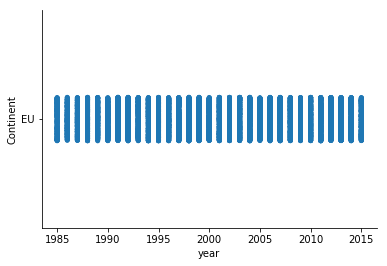

In [14]:
#Just want a month specific crime-type and hour
jitter_data = jitter_data[jitter_data['Continent']=='EU']

#Create Jitter plot
sns.stripplot(x='year', y='Continent', data=jitter_data, jitter=True)
sns.despine()

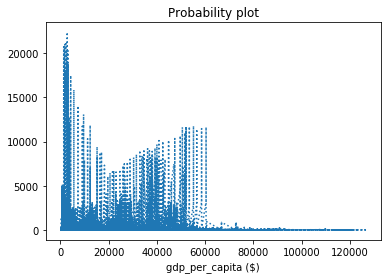

In [15]:
df.plot(x = 'gdp_per_capita ($)', y='suicides_no', legend=False, style = ':',title='Probability plot')

Text(0.5,0,'Continent')

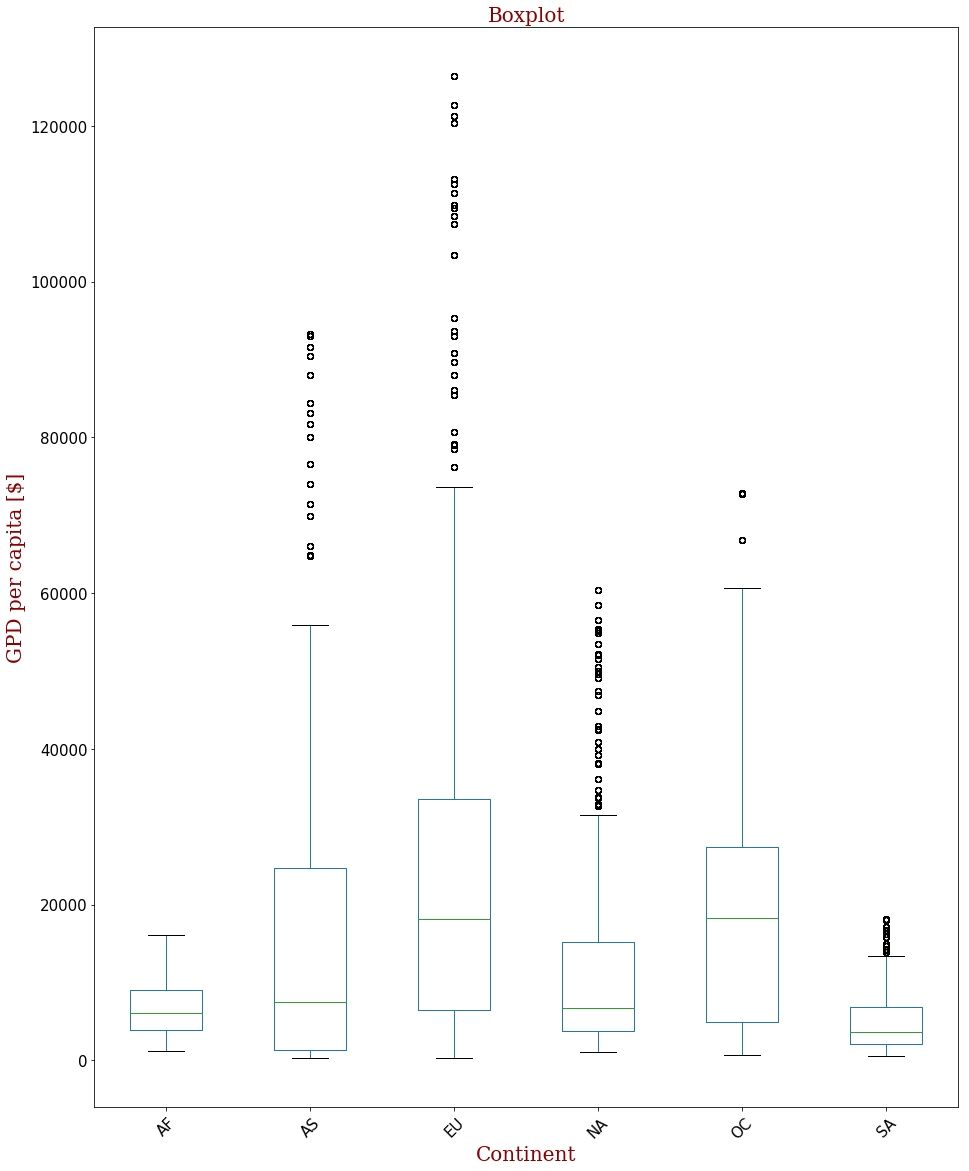

In [16]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

df.boxplot(by='Continent', column = ['gdp_per_capita ($)'], figsize=(15,20), rot=45, grid=False, fontsize=15)
plt.suptitle('')
plt.title('Boxplot', fontsize=20, fontdict = font)
plt.ylabel('GPD per capita [$]', fontsize=20, fontdict = font)
plt.xlabel('Continent', fontsize=20, fontdict = font)

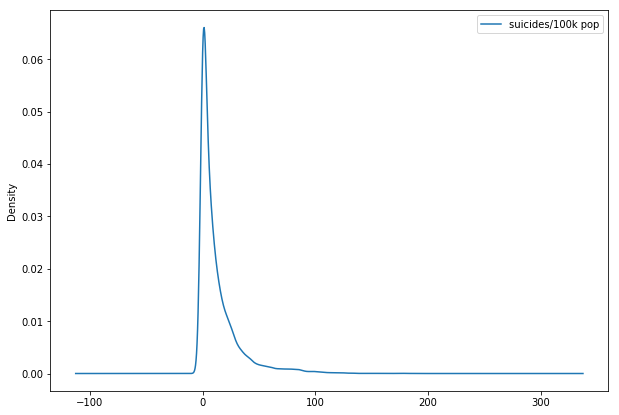

In [136]:
dens = df[['suicides/100k pop']]
dens.plot.kde(figsize = (10,7))

In [17]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,EU
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,EU
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,EU
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,EU
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,EU


In [137]:
ice_data = df[df.country=='San Marino'].groupby('year').sum().reset_index()

In [138]:
ice_data.head()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,1999,2,25192,64.35,579060
1,2000,1,25369,47.26,521220
2,2005,1,28264,34.01,831612


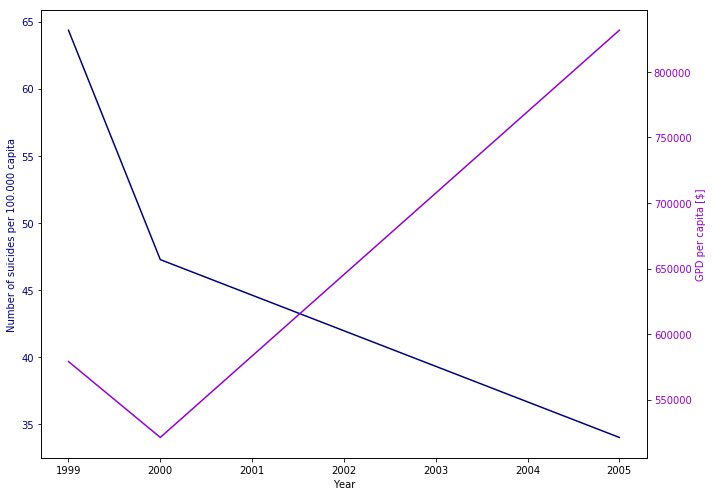

In [139]:
fig, ax1 = plt.subplots(figsize=(10,7))


ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides per 100.000 capita', color='Navy')
ax1.plot(ice_data.year, ice_data['suicides/100k pop'], color='Navy')
ax1.tick_params(axis='y', labelcolor='Navy')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('GPD per capita [$]', color='DarkViolet')  # we already handled the x-label with ax1
ax2.plot(ice_data.year, ice_data['gdp_per_capita ($)'], color='DarkViolet')
ax2.tick_params(axis='y', labelcolor='DarkViolet')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [108]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'North Korea',
       'Romania', 'Russian Federation

In [133]:
eur = df[df.Continent=='AS'].groupby('year').sum().reset_index()

In [134]:
eur.head()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,1985,36182,217624243,1585.09,677484
1,1986,37705,220380365,1532.20,613620
2,1987,30868,212022510,1123.28,843756
3,1988,26578,163458200,1070.90,786948
4,1989,25036,164388700,1044.58,702336


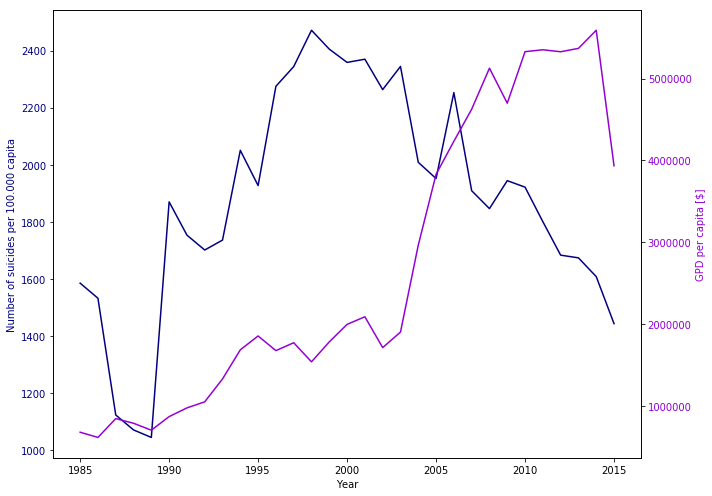

In [135]:
fig, ax1 = plt.subplots(figsize=(10,7))


ax1.set_xlabel('Year')
ax1.set_ylabel('Number of suicides per 100.000 capita', color='Navy')
ax1.plot(eur.year, eur['suicides/100k pop'], color='Navy')
ax1.tick_params(axis='y', labelcolor='Navy')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('GPD per capita [$]', color='DarkViolet')  # we already handled the x-label with ax1
ax2.plot(eur.year, eur['gdp_per_capita ($)'], color='DarkViolet')
ax2.tick_params(axis='y', labelcolor='DarkViolet')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [140]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,Continent
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,EU
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,EU
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,EU
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,EU
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,EU


Text(0.5,0,'Number of suicides per 100 000 inhabitants')

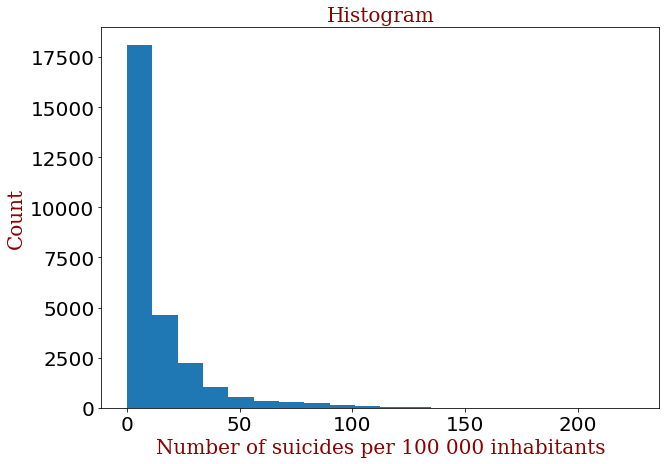

In [158]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }



df.hist(column='suicides/100k pop', grid = False, figsize = (10,7), bins = 20,xlabelsize =20,ylabelsize =20)
plt.suptitle('')
plt.title('Histogram', fontsize=20, fontdict = font)
plt.ylabel('Count', fontsize=20, fontdict = font)
plt.xlabel('Number of suicides per 100 000 inhabitants', fontsize=20, fontdict = font)